
# Project Title: E-Commerce Scraper and Product Analyzer
# Description:Built a Python script to scrape product data from a website, including prices, ratings, and titles. Performed data cleaning and analysis to uncover trends, and visualized findings using Matplotlib. Saved the structured data in a CSV file for further use.
# Skills Demonstrated: Python, Web Scraping (BeautifulSoup, Requests), Data Analysis (Pandas), Data Visualization (Matplotlib), Data Cleaning, Automation.


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

#Scrape book data from the website
def scrape_books(url):
  books_data = []
  while url:
    print(f"Scraping page: {url}")  # Log the current page being scraped
    response = requests.get(url)

        # Check if the request was successful
    if response.status_code != 200:
        print(f"Failed to fetch {url}, status code: {response.status_code}")
        break
    soup=BeautifulSoup(response.text,'html.parser')
    books=soup.find_all('article',class_='product_pod')
    if not books:
      print("No books found on this page. Please check the website structure.")
      break

    for book in books:
      title=book.h3.a['title']
      price=book.find('p',class_='price_color').text.strip()
      price=price.replace('Â£', '').replace('£', '').strip()
      rating=book.p['class'][1]

      try:
        price=float(price)
      except ValueError:
        print(f"Skipping book due to invalid price: {price}")
        continue
      books_data.append({"Title":title,"Price":price,"Rating":rating})

    next_page=soup.find('li',class_='next')
    url=f"http://books.toscrape.com/catalogue/{next_page.a['href']}" if next_page else None

  return books_data if books_data else None

url="http://books.toscrape.com/catalogue/page-1.html"
print("Scraping Data... ")
books_data=scrape_books(url)




Scraping Data... 
Scraping page: http://books.toscrape.com/catalogue/page-1.html
Scraping page: http://books.toscrape.com/catalogue/page-2.html
Scraping page: http://books.toscrape.com/catalogue/page-3.html
Scraping page: http://books.toscrape.com/catalogue/page-4.html
Scraping page: http://books.toscrape.com/catalogue/page-5.html
Scraping page: http://books.toscrape.com/catalogue/page-6.html
Scraping page: http://books.toscrape.com/catalogue/page-7.html
Scraping page: http://books.toscrape.com/catalogue/page-8.html
Scraping page: http://books.toscrape.com/catalogue/page-9.html
Scraping page: http://books.toscrape.com/catalogue/page-10.html
Scraping page: http://books.toscrape.com/catalogue/page-11.html
Scraping page: http://books.toscrape.com/catalogue/page-12.html
Scraping page: http://books.toscrape.com/catalogue/page-13.html
Scraping page: http://books.toscrape.com/catalogue/page-14.html
Scraping page: http://books.toscrape.com/catalogue/page-15.html
Scraping page: http://books.tos

Scraped 1000 books.
Data saved to books_data.csv

--- Data Analysis ---
Basic Statistics:
            Price
count  1000.00000
mean     35.07035
std      14.44669
min      10.00000
25%      22.10750
50%      35.98000
75%      47.45750
max      59.99000

Average Price by Rating:
Rating
Five     35.374490
Four     36.093296
One      34.561195
Three    34.692020
Two      34.810918
Name: Price, dtype: float64


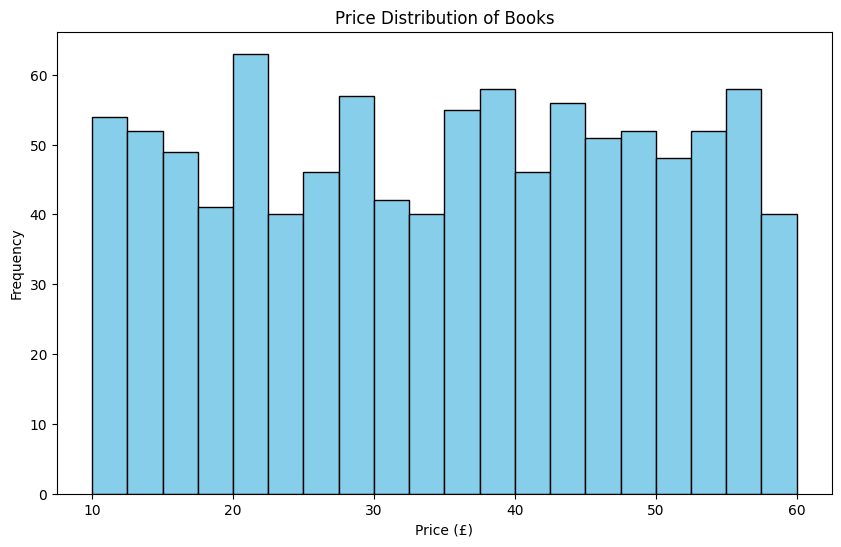

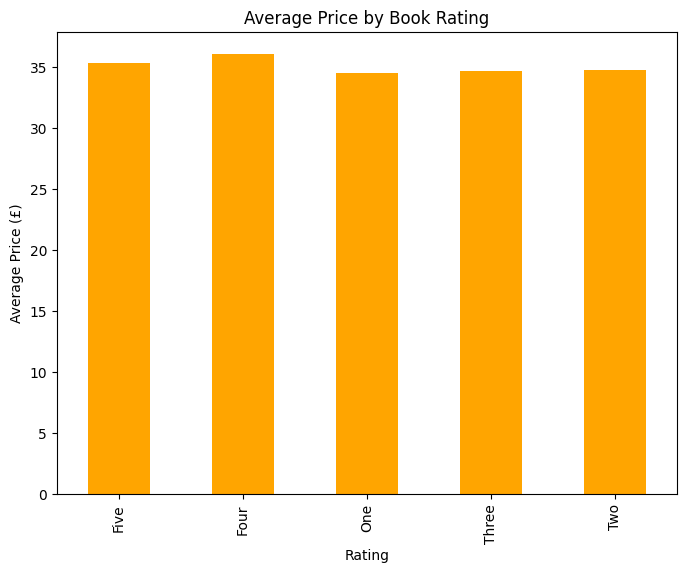

In [9]:
# Handle cases where no data was scraped
if books_data:
    print(f"Scraped {len(books_data)} books.")

    # Convert the scraped data into a DataFrame
    df = pd.DataFrame(books_data)

    # Save the data to a CSV file
    csv_file = 'books_data.csv'
    df.to_csv(csv_file, index=False)
    print(f"Data saved to {csv_file}")

    # Data Analysis and Visualization
    print("\n--- Data Analysis ---")

    # Basic Statistics
    print("Basic Statistics:")
    print(df.describe())

    # Average Price by Rating
    avg_price_by_rating = df.groupby('Rating')['Price'].mean()
    print("\nAverage Price by Rating:")
    print(avg_price_by_rating)

    # Visualization 1: Price Distribution
    plt.figure(figsize=(10, 6))
    plt.hist(df['Price'], bins=20, color='skyblue', edgecolor='black')
    plt.title("Price Distribution of Books")
    plt.xlabel("Price (£)")
    plt.ylabel("Frequency")
    plt.show()

    # Visualization 2: Average Price by Rating
    avg_price_by_rating.plot(kind='bar', color='orange', figsize=(8, 6))
    plt.title("Average Price by Book Rating")
    plt.xlabel("Rating")
    plt.ylabel("Average Price (£)")
    plt.show()

else:
    print("No books were scraped. Please check the function or the website structure.")
